## Observations and Insights

1- The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is **0.84** which is help us to understand that our calculations are correct and there is a strong relationship between the relative movements of two variables.

2- **Population of male mouses** is slightly higher than **number of females**. However we need more data and analyze to figure it out which drug regimen is more affactive on which gender. 

3- Based on this data, *Capomulin* seems to be the clear winner in terms of efficacy at reducing tumor size

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

df = pd.merge(mouse_metadata, study_results, how="left", on= "Mouse ID")

df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

summary_df = df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

summary_df.columns = ['Tumor V Mean','Tumor V Median','Tumor V Variance',
                      'Tumor V Std','Tumor V SEM']

summary_df

,Tumor V Mean,Tumor V Median,Tumor V Variance,Tumor V Std,Tumor V SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [3]:
bar_data = pd.DataFrame({'Drug Regimen': df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().keys(),
                        'Count': df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().values})

bar_data.set_index('Drug Regimen', inplace=True)

bar_data

,Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


Text(0, 0.5, 'Tumor Volume (mm3)')

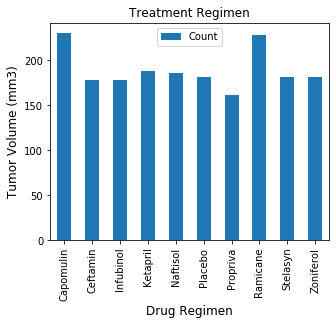

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

bar_char = bar_data.plot(kind='bar', title ="Treatment Regimen",figsize=(5,4),legend=True, fontsize=10)

bar_char.set_xlabel("Drug Regimen",fontsize=12)

bar_char.set_ylabel("Tumor Volume (mm3)",fontsize=12)

<function matplotlib.pyplot.show(*args, **kw)>

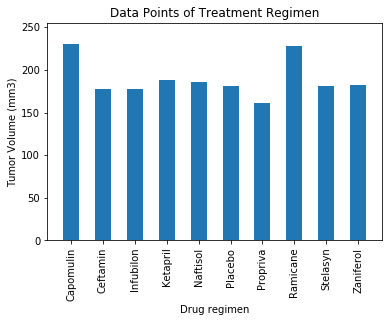

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


regimen = ["Capomulin", "Ceftamin", "Infubilon", "Ketapril", "Naftisol", "Placebo",
          "Propriva", "Ramicane", "Stelasyn", "Zaniferol"]

# count = [230, 178, 178, 188, 186, 181, 161, 228, 181,182]


x_axis = np.arange(len(bar_data))

tick_locations = [value for value in x_axis]

count = bar_data['Count']

plt.bar(x_axis, count, width=.5, align="center")

plt.xticks(tick_locations, regimen, rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(count)+25)

plt.title("Data Points of Treatment Regimen")

plt.xlabel("Drug regimen")

plt.ylabel("Tumor Volume (mm3)")

plt.show

## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A51CD2948>],
      dtype=object)

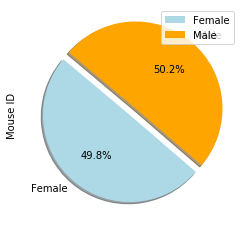

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_groups = df.loc[:, ['Sex','Mouse ID']]

mice_groups = mice_groups.drop_duplicates()

gender_mice = mice_groups.groupby('Sex')

gender_mice = gender_mice.count()

explode = (0,0.1)

colors = ["lightblue","orange"]

gender_mice.plot.pie(subplots=True, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors, startangle=140)

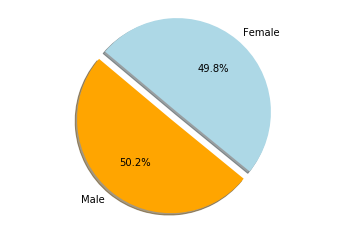

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male = df.loc[df['Sex'] == 'Male',:]

total_male = len(male["Mouse ID"].unique())

female = df.loc[df['Sex'] == 'Female',:]

total_female = len(female["Mouse ID"].unique())

total = total_female + total_male

numbers = [125, 124]

explode = (0,0.1)

labels = ["Male","Female"]

colors = ["orange","lightblue"]

plt.pie(numbers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 


df_2 = df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]

capo = df_2.loc[df_2['Drug Regimen'] == 'Capomulin']

capo = capo.groupby("Mouse ID").tail(1)

print(capo)

     Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
19       s185         45           23.343598    Capomulin
29       x401         45           28.484033    Capomulin
39       m601         45           28.430964    Capomulin
64       f966         20           30.485985    Capomulin
104      u364         45           31.023923    Capomulin
124      y793         45           31.896238    Capomulin
134      r554         45           32.377357    Capomulin
144      m957         45           33.329098    Capomulin
164      t565         45           34.455298    Capomulin
204      i738         45           37.311846    Capomulin
224      w914         45           36.041047    Capomulin
244      g288         45           37.074024    Capomulin
282      l897         45           38.846876    Capomulin
299      b742         45           38.939633    Capomulin
309      b128         45           38.982878    Capomulin
317      j246         35           38.753265    Capomulin
337      j119 

In [10]:
df_2 = df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]

rami = df_2.loc[df_2['Drug Regimen'] == 'Ramicane']

rami = rami.groupby("Mouse ID").tail(1)

print(rami)

    Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
9       k403         45           22.050126     Ramicane
49      g791         45           29.128472     Ramicane
59      s508         45           30.276232     Ramicane
74      m546         45           30.564625     Ramicane
84      z578         45           30.638696     Ramicane
94      j913         45           31.560470     Ramicane
114     n364         45           31.095335     Ramicane
154     c758         45           33.397653     Ramicane
174     a644         45           32.978522     Ramicane
184     i177         45           33.562402     Ramicane
194     j989         45           36.134852     Ramicane
214     a520         45           38.810366     Ramicane
234     r811         45           37.225650     Ramicane
254     i334         45           36.374510     Ramicane
262     q610         35           36.561652     Ramicane
272     d251         45           37.311236     Ramicane
289     c458         30        

In [11]:
df_2 = df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]

infu = df_2.loc[df_2['Drug Regimen'] == 'Infubinol']

infu = infu.groupby("Mouse ID").tail(1)

print(infu)

     Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
463      a203         45           67.973419    Infubinol
473      a251         45           65.525743    Infubinol
530      a577         30           57.031862    Infubinol
540      a685         45           66.083066    Infubinol
637      c139         45           72.226731    Infubinol
669      c326          5           36.321346    Infubinol
742      c895         30           60.969711    Infubinol
800      e476         45           62.435404    Infubinol
834      f345         45           60.918767    Infubinol
949      i386         40           67.289621    Infubinol
1053     k483         45           66.196912    Infubinol
1076     k804         35           62.117279    Infubinol
1205     m756          5           47.010364    Infubinol
1225     n671         30           60.165180    Infubinol
1312     o809         35           55.629428    Infubinol
1314     o813          5           45.699331    Infubinol
1397     q132 

In [12]:
df_2 = df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]

cefta = df_2.loc[df_2['Drug Regimen'] == 'Ceftamin']

cefta = cefta.groupby("Mouse ID").tail(1)

print(cefta)

     Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
493      a275         45           62.999356     Ceftamin
594      b447          0           45.000000     Ceftamin
600      b487         25           56.057749     Ceftamin
617      b759         30           55.742829     Ceftamin
840      f436         15           48.722078     Ceftamin
940      h531          5           47.784682     Ceftamin
993      j296         45           61.849023     Ceftamin
1033     k210         45           68.923185     Ceftamin
1112     l471         45           67.748662     Ceftamin
1119     l490         30           57.918381     Ceftamin
1122     l558         10           46.784535     Ceftamin
1132     l661         45           59.851956     Ceftamin
1162     l733         45           64.299830     Ceftamin
1260     o287         45           59.741901     Ceftamin
1379     p438         45           61.433892     Ceftamin
1406     q483         40           64.192341     Ceftamin
1551     t573 

In [13]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#---------------------Capomulin-----------------------------------#

quartiles = capo['Tumor Volume (mm3)'].quantile([.25,.5,.75])

lowerq = quartiles[0.25]

upperq = quartiles[0.75]

iqr = upperq-lowerq

print('Capomulin IQR')

print(f"The lower quartile of tumor volume is: {lowerq}")

print(f"The upper quartile of tumor volume is: {upperq}")

print(f"The interquartile range of tumor volume is: {iqr}")

print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)

upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")

print(f"Values above {upper_bound} could be outliers.")

Capomulin IQR
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [14]:
#---------------------Ramicane-----------------------------------#

quartiles = rami['Tumor Volume (mm3)'].quantile([.25,.5,.75])

lowerq = quartiles[0.25]

upperq = quartiles[0.75]

iqr = upperq-lowerq

print('Ramicane IQR')

print(f"The lower quartile of tumor volume is: {lowerq}")

print(f"The upper quartile of tumor volume is: {upperq}")

print(f"The interquartile range of tumor volume is: {iqr}")

print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)

upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")

print(f"Values above {upper_bound} could be outliers.")

Ramicane IQR
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [16]:
#---------------------Infubinol-----------------------------------#

quartiles = infu['Tumor Volume (mm3)'].quantile([.25,.5,.75])

lowerq = quartiles[0.25]

upperq = quartiles[0.75]

iqr = upperq-lowerq

print('Infubinol IQR')

print(f"The lower quartile of tumor volume is: {lowerq}")

print(f"The upper quartile of tumor volume is: {upperq}")

print(f"The interquartile range of tumor volume is: {iqr}")

print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)

upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")

print(f"Values above {upper_bound} could be outliers.")

Infubinol IQR
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [17]:
#---------------------Ceftamin-----------------------------------#

quartiles = cefta['Tumor Volume (mm3)'].quantile([.25,.5,.75])

lowerq = quartiles[0.25]

upperq = quartiles[0.75]

iqr = upperq-lowerq

print('Ceftamin IQR')

print(f"The lower quartile of tumor volume is: {lowerq}")

print(f"The upper quartile of tumor volume is: {upperq}")

print(f"The interquartile range of tumor volume is: {iqr}")

print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)

upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")

print(f"Values above {upper_bound} could be outliers.")

Ceftamin IQR
The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


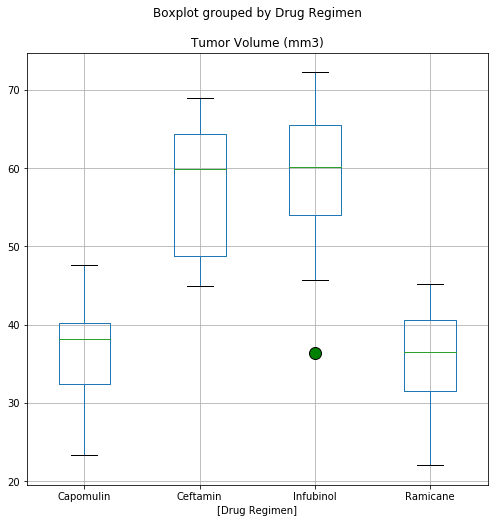

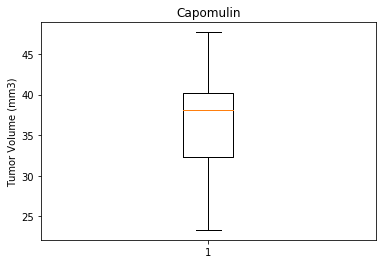

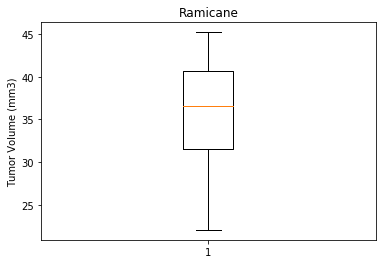

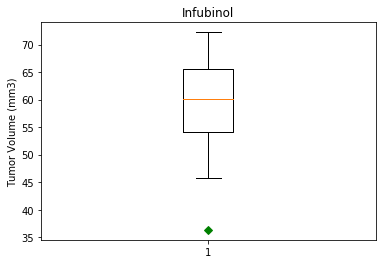

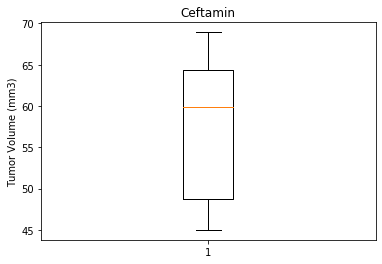

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

combined = capo[['Tumor Volume (mm3)',"Drug Regimen"]]

combined = combined.append(rami[['Tumor Volume (mm3)',"Drug Regimen"]])

combined = combined.append(infu[['Tumor Volume (mm3)',"Drug Regimen"]])

combined = combined.append(cefta[['Tumor Volume (mm3)',"Drug Regimen"]])



flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')

combined.boxplot(by="Drug Regimen", flierprops=flierprops, figsize=(8,8))

plt.show()


fig1, ax1 = plt.subplots()

ax1.set_title('Capomulin')

ax1.set_ylabel('Tumor Volume (mm3)')

ax1.boxplot(capo['Tumor Volume (mm3)'], 0, 'gD')

plt.show()


fig2, ax2 = plt.subplots()

ax2.set_title('Ramicane')

ax2.set_ylabel('Tumor Volume (mm3)')

ax2.boxplot(rami['Tumor Volume (mm3)'], 0, 'gD')

plt.show()


fig3, ax3 = plt.subplots()

ax3.set_title('Infubinol')

ax3.set_ylabel('Tumor Volume (mm3)')

ax3.boxplot(infu['Tumor Volume (mm3)'], 0, 'gD')

plt.show()


fig4, ax4 = plt.subplots()

ax4.set_title('Ceftamin')

ax4.set_ylabel('Tumor Volume (mm3)')

ax4.boxplot(cefta['Tumor Volume (mm3)'], 0, 'gD')

plt.show()

In [19]:
combined

,Tumor Volume (mm3),Drug Regimen
19,23.343598,Capomulin
29,28.484033,Capomulin
39,28.430964,Capomulin
64,30.485985,Capomulin
104,31.023923,Capomulin
...,...,...
1743,45.000000,Ceftamin
1773,64.634949,Ceftamin
1797,61.386660,Ceftamin
1845,68.594745,Ceftamin


## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

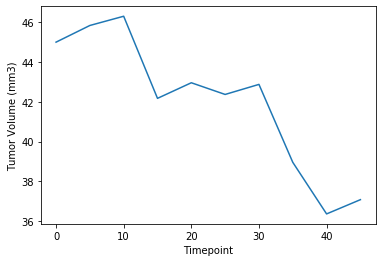

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line_plot = df.loc[df['Drug Regimen'] == 'Capomulin']

mouse_list = line_plot.drop_duplicates(['Mouse ID'])

mouse_list = list(mouse_list['Mouse ID'])

line_data = line_plot.loc[line_plot['Mouse ID'] == random.choice(mouse_list)]

subjectid = line_data.iloc[0]['Mouse ID']

x_values = line_data['Timepoint']

y_values = line_data['Tumor Volume (mm3)']

plt.plot(x_values,y_values)

plt.xlabel('Timepoint')

plt.ylabel('Tumor Volume (mm3)')

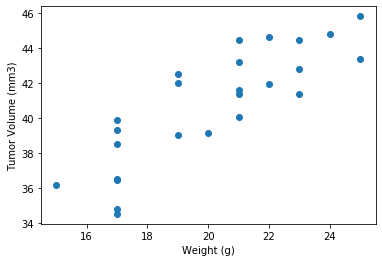

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter_plot = line_plot.groupby(['Mouse ID'])

weight = scatter_plot['Weight (g)'].mean()

av_tumor = scatter_plot['Tumor Volume (mm3)'].mean()

scatter_pd = pd.merge(weight, av_tumor, on='Mouse ID')

# print(scatter_pd)

plt.scatter(scatter_pd.iloc[:,0],scatter_pd.iloc[:,1])

plt.xlabel('Weight (g)')

plt.ylabel('Tumor Volume (mm3)')

plt.show()

Correlation / Coefficient of Weight vs Ave Tumor Volume for the Capomulin regimen is 0.84


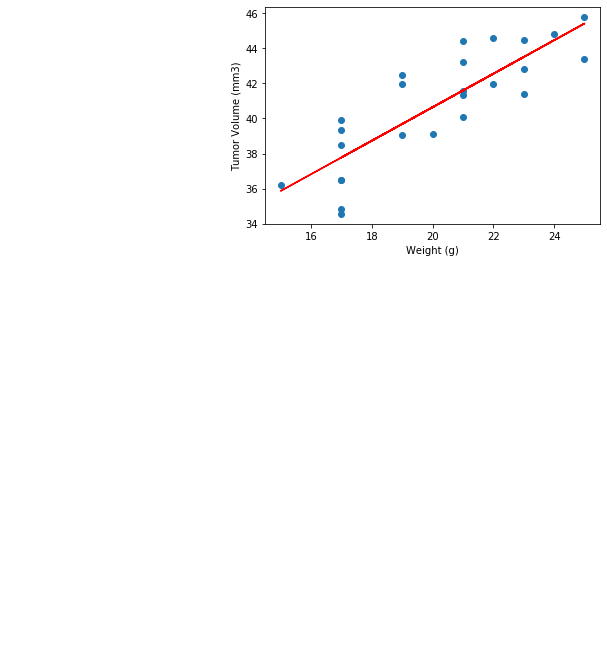

In [22]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average 
#tumor volume for the Capomulin regimen

x_values = scatter_pd.iloc[:,0]

y_values = scatter_pd.iloc[:,1]

print(f"Correlation / Coefficient of Weight vs Ave Tumor Volume for the Capomulin regimen is {round(st.pearsonr(x_values,y_values)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Weight (g)')

plt.ylabel('Tumor Volume (mm3)')

plt.show()